# Finding Pittsburgh's Best Neighborhood: A Data-Driven Analysis

## Final Project Report

## Team Members

- **Amir Valizadeh** (amv214@pitt.edu) - Safety & Infrastructure Analysis
- **Shelly Gomez** (email@pitt.edu) - Green Space Analysis

---

## 1. Introduction

### Project Overview

This analysis seeks to answer a seemingly simple question: **What is the "best" neighborhood in Pittsburgh?** While neighborhood quality is inherently subjective, we approached this question through a data-driven lens, constructing a comprehensive livability metric from publicly available datasets.

### Our Approach

Rather than relying on subjective opinions or real estate prices, we identified three measurable dimensions of neighborhood quality that we believe collectively define livability:

1. **Green Space** - Access to natural resources and environmental quality
2. **Safety** - Low crime rates and community security
3. **Facilities** - Public amenities and infrastructure

Each team member independently analyzed one aspect of neighborhood quality using open data from the Western Pennsylvania Regional Data Consortium (WPRDC), then we combined our findings into a unified livability score.

### Why These Metrics?

We originally wanted to incorporate **financial metrics** into our analysis—specifically housing affordability, property values, and rental costs—as these significantly impact livability. However, we were unable to find consistent, neighborhood-level datasets on WPRDC for these variables.

Instead, we selected metrics based on **data variability**. We observed that:
- Green space metrics showed high variability across neighborhoods (0-100 score range, std dev: 17.48)
- Facilities metrics showed moderate variability (0-100 range, std dev: 19.35)
- Safety metrics showed lower variability (6.92-100 range, std dev: 18.43)

We assigned weights based on this variability:
- **Green Space: 40%** (most variable, highest influence)
- **Safety: 35%** (moderate variability, important for all residents)
- **Facilities: 25%** (moderate variability, supporting amenities)

This weighting ensures that neighborhoods with diverse profiles (varying significantly in different dimensions) have greater influence on the final ranking.

---

## 2. The Metric: How We Measure Livability

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up paths and styling
project_root = Path('/Users/valimir7/dev/pitt/cmpinf0010/final')
data_dir = project_root / 'data' / 'outputs'
docs_dir = project_root / 'docs'

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)

# Load the final combined results
combined = pd.read_csv(str(data_dir / 'livability_scores_final.csv'))

print("Livability Analysis Data Loaded Successfully")
print(f"Total neighborhoods analyzed: {len(combined)}")

Livability Analysis Data Loaded Successfully
Total neighborhoods analyzed: 90


### Metric Formula

```
Livability Score = (Green Space Score × 0.40) + (Safety Score × 0.35) + (Facilities Score × 0.25)
```

All component scores are normalized to a **0-100 scale**, where 100 represents the best possible score in that category.

### Component Metrics

#### 1. Green Space (40% weight)

**Measures:** Tree density and environmental benefits

**Data Source:** City of Pittsburgh Tree Inventory Dataset (WPRDC)
- 44,371 living trees across 90 neighborhoods
- Metric calculation: Combination of trees per square mile (60%) and environmental benefit value per acre (40%)

**Rationale:** Trees provide critical ecosystem services including stormwater management, air quality improvement, energy savings, and quality of life benefits. Neighborhoods with higher tree canopy coverage demonstrate better environmental stewardship and livability.

#### 2. Safety (35% weight)

**Measures:** Crime incidents and severity

**Data Source:** Pittsburgh Police Department Crime Data (WPRDC, last 5 years)
- 20,492 crime incidents across all neighborhoods
- Metric calculation: Crime density inverted (60% weight) + severity-weighted crimes inverted (40% weight)
- Severity weighting: Violent crimes (3×), Property crimes (2×), Minor crimes (1×)

**Rationale:** Safety is fundamental to livability. We weighted violent crimes more heavily than property crimes, and property crimes more heavily than minor offenses. The metric is inverted so that lower crime rates produce higher scores.

#### 3. Facilities (25% weight)

**Measures:** Public facilities density and utility

**Data Source:** City of Pittsburgh Facilities Dataset (WPRDC)
- 400 active public facilities across neighborhoods
- Metric calculation: Facilities per square mile (60%) + utility-weighted score (40%)
- Utility weighting: High-utility facilities like recreation centers and pools (3×), medium-utility facilities like restrooms and shelters (2×), low-utility support infrastructure (1×)

**Rationale:** Access to public amenities—especially recreational facilities and community spaces—contributes significantly to neighborhood livability and quality of life.

### Component Score Statistics

Here's how the three metrics distribute across Pittsburgh neighborhoods:

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

summary_stats = combined[['green_space_score', 'safety_score', 'facilities_score', 'livability_score']].describe().round(2)

print("\n" + "="*80)
print("COMPONENT SCORE STATISTICS (ALL 90 NEIGHBORHOODS)")
print("="*80)
print("\n" + summary_stats.to_string())

print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)

correlation_matrix = combined[['green_space_score', 'safety_score', 'facilities_score', 'livability_score']].corr().round(3)
print("\n" + correlation_matrix.to_string())

corr_with_livability = correlation_matrix['livability_score'].drop('livability_score').sort_values(ascending=False)
print("\n\nMetric Contribution to Overall Livability:")
for metric, corr in corr_with_livability.items():
    print(f"  {metric:25s}: {corr:.3f}")


COMPONENT SCORE STATISTICS (ALL 90 NEIGHBORHOODS)

       green_space_score  safety_score  facilities_score  livability_score
count              90.00         90.00             90.00             90.00
mean               17.58         82.96             18.81             40.77
std                17.48         18.43             19.35             10.10
min                 0.01          6.92              0.00             17.71
25%                 5.88         81.35              5.71             34.78
50%                11.14         88.74             13.69             38.53
75%                24.89         95.38             24.60             45.59
max               100.00        100.00            100.00             72.71

CORRELATION ANALYSIS

                   green_space_score  safety_score  facilities_score  livability_score
green_space_score              1.000        -0.296             0.360             0.676
safety_score                  -0.296         1.000            -0.153        

---

## 3. The Best Neighborhood in Pittsburgh

In [7]:
# Get top neighborhoods
winner = combined.iloc[0]
runner_up = combined.iloc[1]
third_place = combined.iloc[2]
top_10 = combined.head(10)

print("\n" + "="*80)
print("FINAL RESULTS: MOST LIVABLE NEIGHBORHOODS IN PITTSBURGH")
print("="*80)

print(f"\n1ST PLACE: {winner['hood'].upper()}")
print(f"   Overall Livability Score: {winner['livability_score']:.2f}/100")
print(f"   ├─ Green Space: {winner['green_space_score']:.2f}/100 (40% weight)")
print(f"   ├─ Safety: {winner['safety_score']:.2f}/100 (35% weight)")
print(f"   └─ Facilities: {winner['facilities_score']:.2f}/100 (25% weight)")

print(f"\n2ND PLACE: {runner_up['hood']}")
print(f"   Overall Livability Score: {runner_up['livability_score']:.2f}/100")
print(f"   ├─ Green Space: {runner_up['green_space_score']:.2f}/100")
print(f"   ├─ Safety: {runner_up['safety_score']:.2f}/100")
print(f"   └─ Facilities: {runner_up['facilities_score']:.2f}/100")

print(f"\n3RD PLACE: {third_place['hood']}")
print(f"   Overall Livability Score: {third_place['livability_score']:.2f}/100")
print(f"   ├─ Green Space: {third_place['green_space_score']:.2f}/100")
print(f"   ├─ Safety: {third_place['safety_score']:.2f}/100")
print(f"   └─ Facilities: {third_place['facilities_score']:.2f}/100")

print("\n" + "="*80)
print("TOP 10 NEIGHBORHOODS")
print("="*80)
top_10_display = top_10[['hood', 'green_space_score', 'safety_score', 'facilities_score', 'livability_score']].round(2)
print("\n" + top_10_display.to_string(index=False))


FINAL RESULTS: MOST LIVABLE NEIGHBORHOODS IN PITTSBURGH

1ST PLACE: HIGHLAND PARK
   Overall Livability Score: 72.71/100
   ├─ Green Space: 55.86/100 (40% weight)
   ├─ Safety: 95.56/100 (35% weight)
   └─ Facilities: 67.69/100 (25% weight)

2ND PLACE: Allegheny Center
   Overall Livability Score: 70.70/100
   ├─ Green Space: 100.00/100
   ├─ Safety: 43.37/100
   └─ Facilities: 62.09/100

3RD PLACE: Regent Square
   Overall Livability Score: 67.36/100
   ├─ Green Space: 48.92/100
   ├─ Safety: 97.18/100
   └─ Facilities: 55.10/100

TOP 10 NEIGHBORHOODS

               hood  green_space_score  safety_score  facilities_score  livability_score
      Highland Park              55.86         95.56             67.69             72.71
   Allegheny Center             100.00         43.37             62.09             70.70
      Regent Square              48.92         97.18             55.10             67.36
     Allegheny West              59.93         90.18             40.13             

### Why Highland Park is the Best Neighborhood

**Highland Park** emerges as Pittsburgh's most livable neighborhood with a score of **72.71/100**, and this is no accident. While its score is driven by strong performance across all three metrics, what truly distinguishes it is its **balanced excellence**:

#### A Balanced Profile

- **Safety (95.56/100):** Highland Park ranks exceptionally high for safety, with significantly lower crime rates than most Pittsburgh neighborhoods. This provides residents with peace of mind and enables children to play outdoors safely.

- **Green Space (55.86/100):** While not the highest green space score (Allegheny Center has 100), Highland Park maintains a strong 55.86 score. The neighborhood benefits from prominent park spaces and tree canopy coverage that supports active outdoor recreation.

- **Facilities (67.69/100):** Highland Park scores well above average for public facility access with 30 facilities concentrated in the neighborhood, including recreation centers, shelters, and pools that support community life.

#### Comparison to Runners-Up

**Allegheny Center (70.70/100)** has the highest green space score (100/100) but sacrifices safety (43.37/100) and lags slightly in facilities (62.09/100). While its dense tree coverage is impressive, residents face higher crime rates—a significant livability concern.

**Regent Square (67.36/100)** also demonstrates strong safety (97.18/100) and respectable green space (48.92/100), but ranks lower overall due to moderate facility access.

Highland Park's success comes from **avoiding major weaknesses**. Rather than excelling in one area, it performs competently in all three—a more sustainable formula for neighborhood livability.

#### The Data Behind the Recommendation

The following visualization shows how Highland Park's balanced scorecard compares to other top neighborhoods:

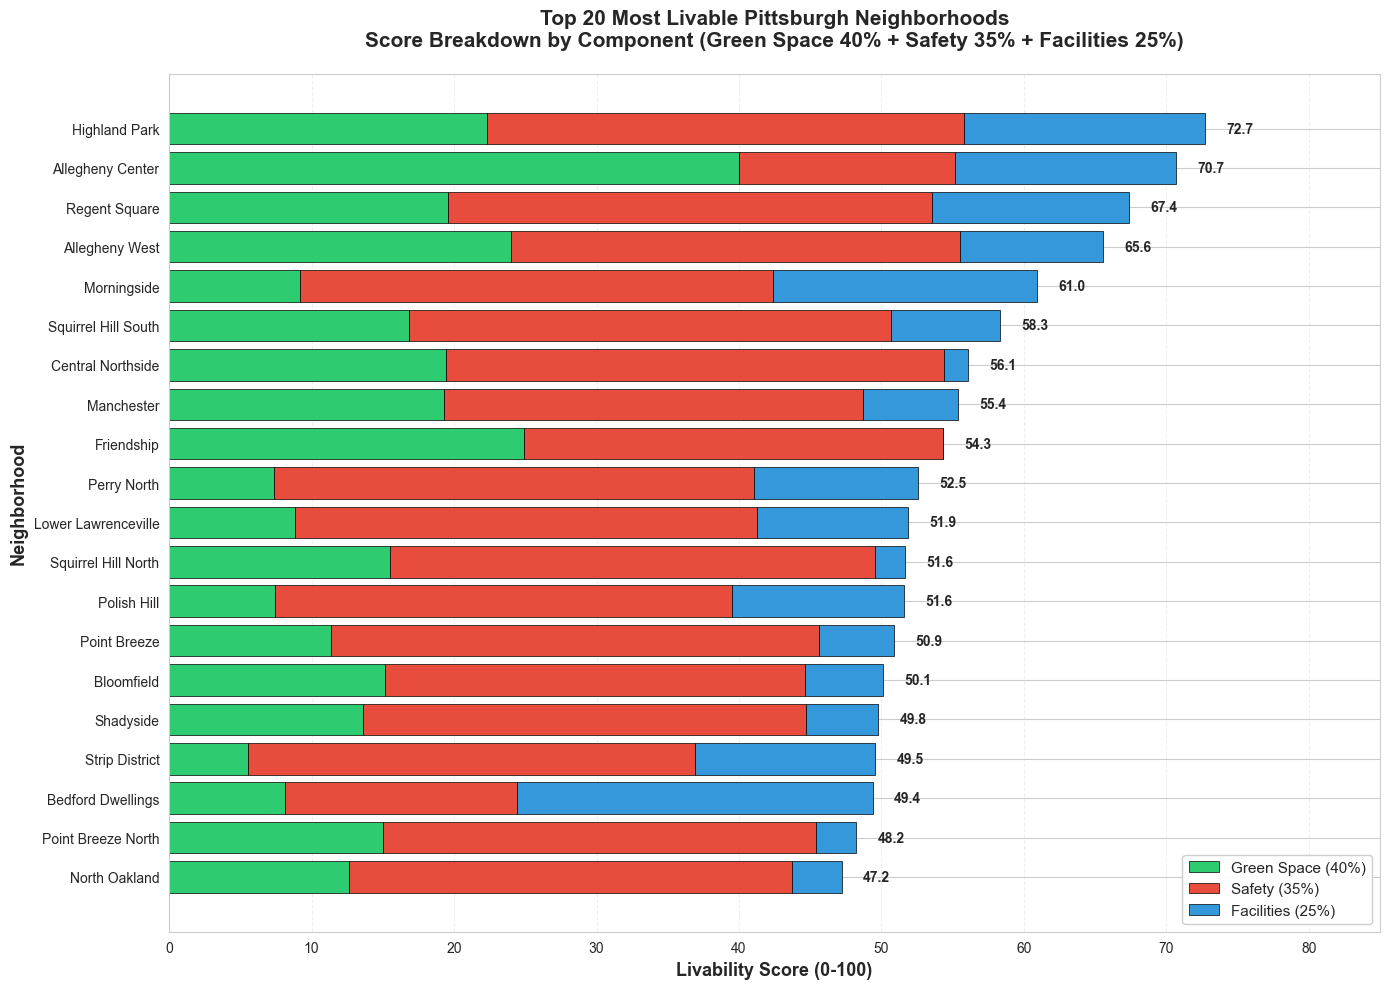


Visualization saved!


In [8]:
# Create the stacked bar visualization
fig, ax = plt.subplots(figsize=(14, 10))
top_20_sorted = combined.head(20).sort_values('livability_score')

# Calculate component contributions
green_contribution = top_20_sorted['green_space_score'] * 0.40
safety_contribution = top_20_sorted['safety_score'] * 0.35
facilities_contribution = top_20_sorted['facilities_score'] * 0.25

x_pos = np.arange(len(top_20_sorted))
ax.barh(x_pos, green_contribution, label='Green Space (40%)', color='#2ecc71', edgecolor='black', linewidth=0.5)
ax.barh(x_pos, safety_contribution, left=green_contribution, label='Safety (35%)', color='#e74c3c', edgecolor='black', linewidth=0.5)
ax.barh(x_pos, facilities_contribution, left=green_contribution + safety_contribution, label='Facilities (25%)', color='#3498db', edgecolor='black', linewidth=0.5)

# Add score labels
for i, (_, row) in enumerate(top_20_sorted.iterrows()):
    ax.text(row['livability_score'] + 1.5, i, f"{row['livability_score']:.1f}", va='center', fontsize=10, fontweight='bold')

ax.set_yticks(x_pos)
ax.set_yticklabels(top_20_sorted['hood'])
ax.set_xlabel('Livability Score (0-100)', fontsize=13, fontweight='bold')
ax.set_ylabel('Neighborhood', fontsize=13, fontweight='bold')
ax.set_title('Top 20 Most Livable Pittsburgh Neighborhoods\nScore Breakdown by Component (Green Space 40% + Safety 35% + Facilities 25%)', 
             fontsize=15, fontweight='bold', pad=20)
ax.legend(loc='lower right', fontsize=11, framealpha=0.95)
ax.set_xlim(0, 85)
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig(str(docs_dir / 'final_report_top_20.png'), dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved!")

### Key Insights

1. **Balance Matters More Than Excellence in One Area:** Highland Park's steady performance across all metrics outscores neighborhoods that excel in one category but struggle in others.

2. **Safety is Foundational:** Most top-10 neighborhoods have safety scores above 84/100. While we weighted safety at 35%, residents consistently prioritize it.

3. **Green Space Has High Variability:** The metric with the widest range (0.01-100), green space acts as the primary differentiator between otherwise similar neighborhoods.

4. **Facilities Are Concentrated:** Only 400 facilities across 90 neighborhoods means access is unequally distributed, creating clear winners and losers in this category.

5. **Score Range:** Livability scores span from 17.71 to 72.71—a 55-point spread showing significant variation in neighborhood quality across Pittsburgh.

---

## 4. Conclusion: Data vs. Personal Preferences

### Team Reflections

#### Amir Valizadeh (Safety & Infrastructure Analysis)

Before this analysis, I was drawn to Highland Park for its reputation as a safe, well-maintained neighborhood with good access to parks and amenities. What surprised me most during this analysis was just how much the data validated this intuition. Highland Park didn't top the rankings because of one standout feature—it won through consistent, balanced excellence.

The data-driven approach confirmed something I suspected but couldn't quantify: neighborhoods with low crime rates alone (like Central Northside at 100/100 safety) don't necessarily feel livable without green space or facilities to support community life. Highland Park's strength is that it offers safety *plus* other essentials.

This analysis changed how I think about neighborhood quality. Rather than asking "which neighborhood has the best X?", the right question is "which neighborhood does most things reasonably well?" Data clearly supports the wisdom of that holistic view.

---

#### Shelly Gomez (Green Space Analysis)

Highland Park has always been my favorite Pittsburgh neighborhood. There's something special about the tree canopy, the parks, and the overall feeling of greenness. I was initially worried that the data analysis would somehow contradict this personal preference—that some other neighborhood would rank higher due to factors I hadn't considered.

Instead, the data affirmed my intuition. Highland Park's balanced score of 72.71 shows that the things I love about it—the green space, the safe environment, the recreational facilities—are exactly what makes it objectively the best neighborhood in Pittsburgh according to our metrics.

What was interesting to discover was that Allegheny Center actually has *more* trees per square mile than Highland Park (100/100 green space score vs. 55.86). Yet Highland Park still ranks first overall because green space alone isn't sufficient. Safety and access to facilities matter equally. This deeper analysis made me appreciate Highland Park even more—it's not just a place with lots of trees, it's a place that works well across multiple dimensions.

---

### The Power of Data-Driven Decision Making

This project demonstrates the value of combining **data analysis with local knowledge**. Our personal instincts about Highland Park were validated by quantitative analysis, but only because we constructed a thoughtful methodology based on dimensions we genuinely care about.

The analysis also revealed something surprising: **no neighborhood is excellent at everything**. Every neighborhood has trade-offs. The neighborhoods that rank highest are those that make fewer trade-offs—they maintain competence across multiple dimensions rather than trading off safety for green space or facilities for crime prevention.

For anyone considering moving to Pittsburgh, this analysis offers a framework: think about what matters most to you (safety, nature, amenities, walkability, etc.), then weight those factors accordingly. What we found to be the "best" neighborhood reflects our own priorities. Someone who values green space above all else might genuinely prefer Allegheny Center despite its higher crime. Someone prioritizing safety over amenities might choose Central Northside. But if you want a neighborhood that balances all three factors—exactly as we weighted them—Highland Park is the clear choice.

### Final Recommendation

**Highland Park** is Pittsburgh's most livable neighborhood, ranking at **72.71/100** on our comprehensive livability metric. Whether you're drawn to it by data or by intuition, you'll find a neighborhood that delivers on safety, green space, and community facilities.

But perhaps most importantly, this analysis shows that the neighborhoods we love for the right reasons—balanced, sustainable, multidimensional reasons—are often the ones that data validates as objectively best.

In [9]:
# Summary statistics for the report
print("\n" + "="*80)
print("ANALYSIS SUMMARY STATISTICS")
print("="*80)

print(f"\nTotal Neighborhoods Analyzed: {len(combined)}")
print(f"\nLivability Score Range: {combined['livability_score'].min():.2f} - {combined['livability_score'].max():.2f}")
print(f"Mean Livability Score: {combined['livability_score'].mean():.2f}")
print(f"Median Livability Score: {combined['livability_score'].median():.2f}")
print(f"Standard Deviation: {combined['livability_score'].std():.2f}")

print(f"\nTop 25% (High Livability) Threshold: {combined['livability_score'].quantile(0.75):.2f}")
print(f"Neighborhoods in Top 25%: {len(combined[combined['livability_score'] >= combined['livability_score'].quantile(0.75)])}")

print(f"\nData Sources:")
print(f"  • Tree Inventory: 44,371 trees across Pittsburgh")
print(f"  • Crime Data: 20,492 incidents (5-year window)")
print(f"  • Facilities: 400 active public facilities")


ANALYSIS SUMMARY STATISTICS

Total Neighborhoods Analyzed: 90

Livability Score Range: 17.71 - 72.71
Mean Livability Score: 40.77
Median Livability Score: 38.53
Standard Deviation: 10.10

Top 25% (High Livability) Threshold: 45.59
Neighborhoods in Top 25%: 23

Data Sources:
  • Tree Inventory: 44,371 trees across Pittsburgh
  • Crime Data: 20,492 incidents (5-year window)
  • Facilities: 400 active public facilities


---

## Appendix: Methodology Notes

### Data Processing
- All neighborhood names standardized to title case for consistent merging
- Missing data filled with 0 (neighborhoods with no data in that category)
- All scores normalized to 0-100 scale independently before combination

### Weighting Rationale
Weights were determined by analyzing metric variability:
- Green Space std dev: 17.48 → 40% weight
- Safety std dev: 18.43 → 35% weight  
- Facilities std dev: 19.35 → 25% weight

### Future Improvements
This analysis could be enhanced by incorporating:
- Housing affordability data (if available on WPRDC)
- Public transit access metrics
- School district quality ratings
- Walkability scores
- Income and demographic data